## Big cities

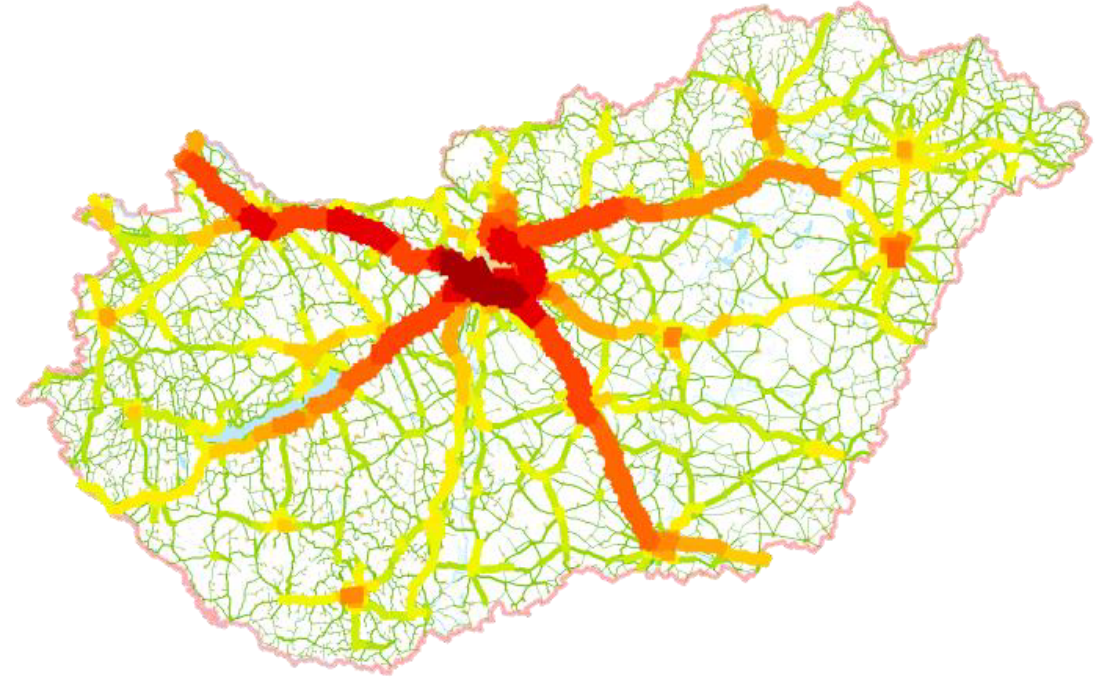

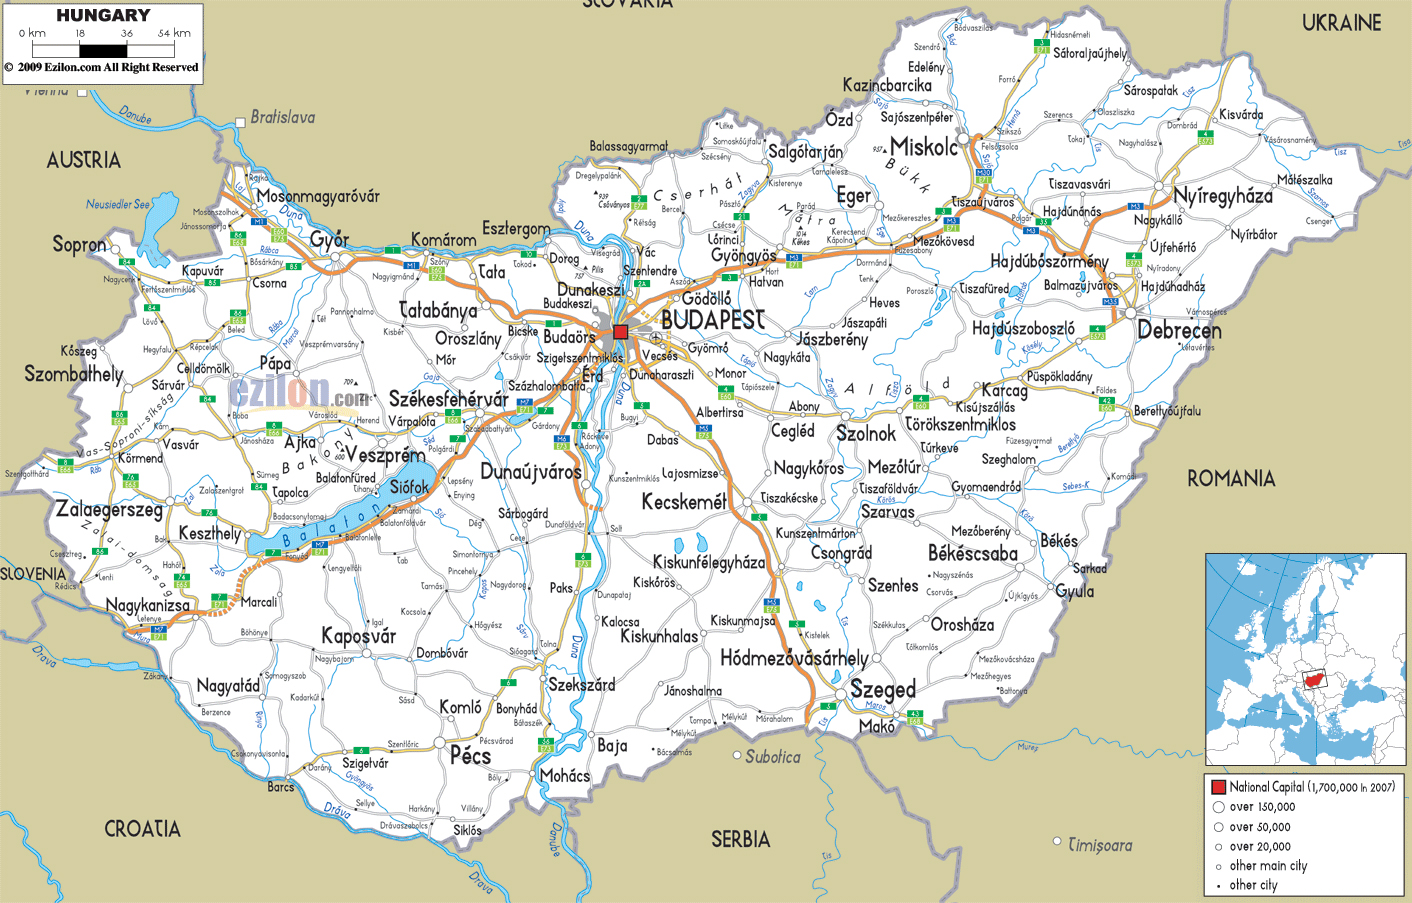

- M5: Budapest-Kecskemét (E75), Kecskemét-Szeged (M5 E75, 5)<br>
- 4: Budapest Szolnok (E60), Szolnok-Debrecen, 4 E573 (?), 4: Debrecen-Nyíregyháza (+Kv, Zh)
- M3: Budapest-Miskolc/Debrecen/Nyíregyháza (M3 E71): Miskolc (M30 + 3), M3+M35 Debrecen, M3 Nyíregyháza. Pár út NY1 és Miskolc közt
- M6: Budapest-Dunaújváros-Szekszárd-Pécs (M6 E73?, 6)
- M7: Budapest-Székesfehérvár-Balaton... (M7 E71, 7)
- M1: Budapest-Győr (M1 E60+E75, 1), M85 Sopron, M85+M86 Szombathely
- M0: Budapest ...

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gdf = gpd.read_file("data/Hungary_2022_static_road_data.geojson")

#### Explanation of attributes

- id: ... 
- kszam: Road number (közút szám)
- pkod: ?, Values: 0, 1, 2, mostly 0. On M5 between Budapest and Szeged, we have around half-half 1 and 2, in fact first half of variables represent mostly 0, second half. May represent different directions or something similar, maybe 0 means back-and-forth.
- kszelv, vszelv: Start and end settlements (kezdő és végszelvény)
- asz: Station number (állomás szám)
- anf: Average daily traffic (átlagos napi forgalom), always available
- oj: total vehicles/day, all types (összjármű) 
- ongj: heavy vehicles/day (összes nehézgépjármű)
- ev: Year
- geometry: Road geometry

In [18]:
gdf[0:4]

id kszam pkod     kszelv     vszelv     asz    anf       oj    ongj  \
0   963   M43    1    5 + 260    5 + 539  3923.0  34512  24481.0  5587.0   
1  1466    M4    1  226 + 756  227 + 082  2791.0   5290   3170.0  1364.0   
2  1667    M4    1  220 + 355  226 + 756  2790.0   3718   2281.0   924.0   
3  1988    M4    1  219 + 930  220 + 355  2790.0   3718   2281.0   924.0   

     ev                                           geometry  
0  2022  MULTILINESTRING ((731774.360 106214.871, 73205...  
1  2022  MULTILINESTRING ((848187.895 212117.248, 84819...  
2  2022  MULTILINESTRING ((842594.594 213060.017, 84323...  
3  2022  MULTILINESTRING ((842351.564 213406.554, 84259...

In [32]:
gdf[gdf['asz']==3484]

id kszam pkod   kszelv   vszelv     asz    anf       oj     ongj    ev  \
795  5028    M0    2  1 + 045  1 + 812  3484.0  71027  51397.0  12301.0  2022   
796  3220    M0    2  0 + 223  1 + 045  3484.0  71027  51397.0  12301.0  2022   
856  3771    M0    1  0 + 604  1 + 903  3484.0  71027  51397.0  12301.0  2022   
857  5739    M0    1  0 + 223  0 + 604  3484.0  71027  51397.0  12301.0  2022   
858  4676    M0    0  0 + 000  0 + 223  3484.0  71027  51397.0  12301.0  2022   

                                              geometry  
795  MULTILINESTRING ((637783.735 234286.426, 63780...  
796  MULTILINESTRING ((637285.961 235065.773, 63729...  
856  MULTILINESTRING ((637460.414 234729.689, 63750...  
857  MULTILINESTRING ((637282.126 235065.214, 63728...  
858  MULTILINESTRING ((637254.364 235286.249, 63725...

### Some analysis-preparation:

#### M5

There is a difference between the two directions of M5, the first half of the instances have `pkod == 1`, the second half have `pkod == 2`. This may mean that the two directions are separated. (Also shows because the two routes map to basically the same thing.)

We only look at `pkod == 1` cases.

Budapest to Kecskemét:

<Axes: >

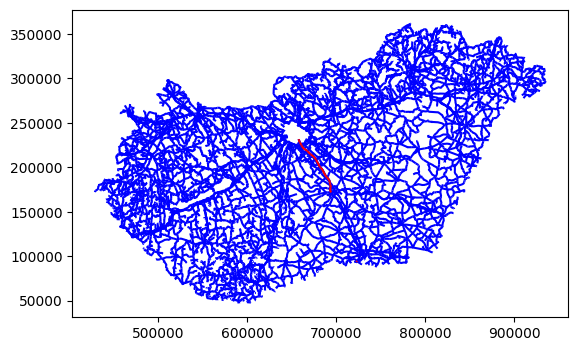

In [157]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
gdf[(gdf['kszam']=='M5') &  (gdf['pkod']=='1')][0:30].plot(ax=ax, color='red')

Kecskemét to Szeged:

<Axes: >

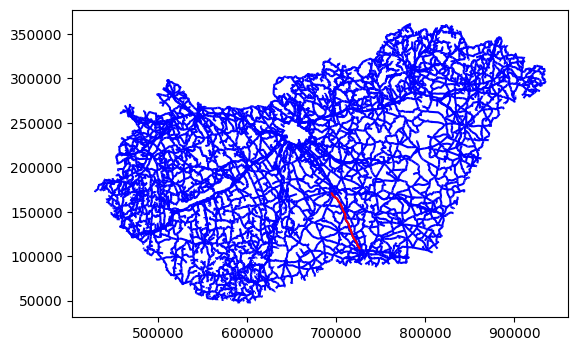

In [158]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
gdf[(gdf['kszam']=='M5') &  (gdf['pkod']=='1')][30:50].plot(ax=ax, color='red')

A diagram of the traffic for each road segment (as we get further away from Budapest):

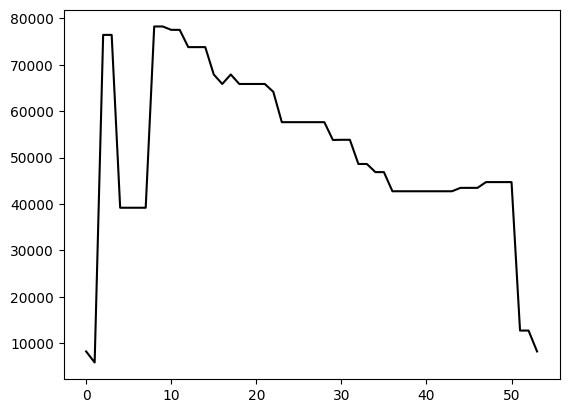

In [153]:
plt.plot(list(range(0, len(gdf[(gdf['kszam']=='M5') &  (gdf['pkod']=='1')]))), gdf[(gdf['kszam']=='M5') &  (gdf['pkod']=='1')]['anf'], color='black')

#### Road 5

In [230]:
full_road = gdf[(gdf['kszam']=='5') &  (gdf['pkod']!='2')]

In [231]:
full_road

id kszam pkod      kszelv      vszelv     asz    anf       oj  \
142   13064     5    1    90 + 408    90 + 743  8820.0  11996  11343.0   
172   15508     5    0   168 + 133   169 + 262  5221.0  22807  21854.0   
279   13675     5    1   108 + 467   108 + 499  3368.0   6689   5485.0   
504   17078     5    1  162 + 1029  162 + 1058  1222.0  12219  10815.0   
650   15085     5    1   183 + 399   183 + 429  5222.0   4863   4491.0   
...     ...   ...  ...         ...         ...     ...    ...      ...   
1255  15541     5    0   183 + 724   184 + 430  6752.0    253    137.0   
1256  15278     5    0   184 + 430   184 + 880  6752.0    253    137.0   
1257  15707     5    0   184 + 880   185 + 065  6752.0    253    137.0   
1258  17083     5    1   185 + 065   185 + 286  6752.0    253    137.0   
1259  14111     5    1   185 + 286   185 + 401     5.0    537    539.0   

        ongj    ev                                           geometry  
142    660.0  2022  MULTILINESTRING ((700339.090 171005.783, 70034...  
172   1051.0  2022  MULTILINESTRING ((733536.868 102770.328, 73358...  
279    550.0  2022  MULTILINESTRING ((710078.378 155905.728, 71008...  
504    788.0  2022  MULTILINESTRING ((729941.923 105647.895, 72994...  
650    185.0  2022  MULTILINESTRING ((723404.937 94425.479, 723404...  
...      ...   ...                                                ...  
1255    64.0  2022  MULTILINESTRING ((723185.522 94205.301, 723173...  
1256    64.0  2022  MULTILINESTRING ((722834.662 93580.673, 722803...  
1257    64.0  2022  MULTILINESTRING ((722625.597 93176.078, 722516...  
1258    64.0  2022  MULTILINESTRING ((722516.182 93028.095, 722504...  
1259     0.0  2022  MULTILINESTRING ((722356.612 92888.958, 722298...  

[144 rows x 11 columns]

Budapest-Kecskemét:

<Axes: >

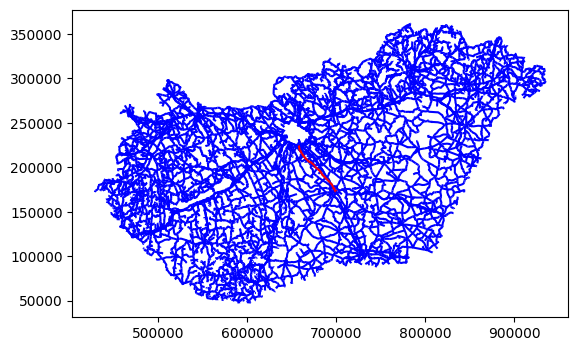

In [243]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[7:60].plot(ax=ax, color='red')

Kecskemét-Szeged:

<Axes: >

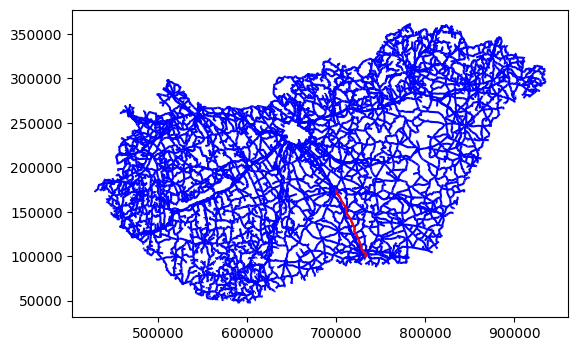

In [237]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[60:130].plot(ax=ax, color='red')

Traffic on the road segments:

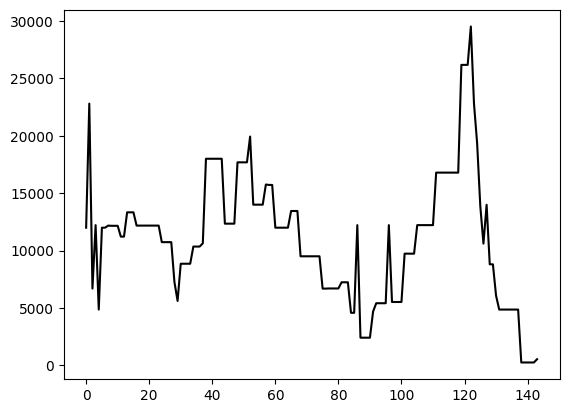

In [234]:
plt.plot(list(range(0, len(full_road))), full_road['anf'], color='black')

#### M4

M4 highway between Budapest and Szolnok:

In [203]:
full_road = gdf[(gdf['kszam']=='M4') & (gdf['pkod']!='2')]

<Axes: >

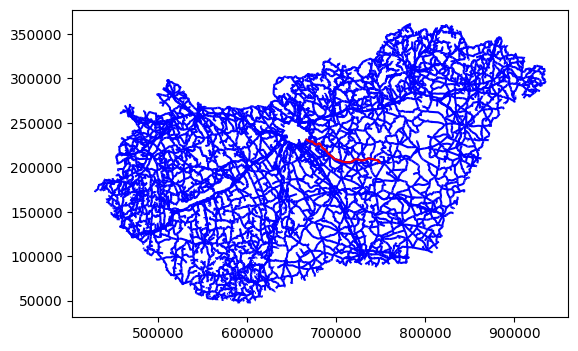

In [217]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[6:49].plot(ax=ax, color='red')

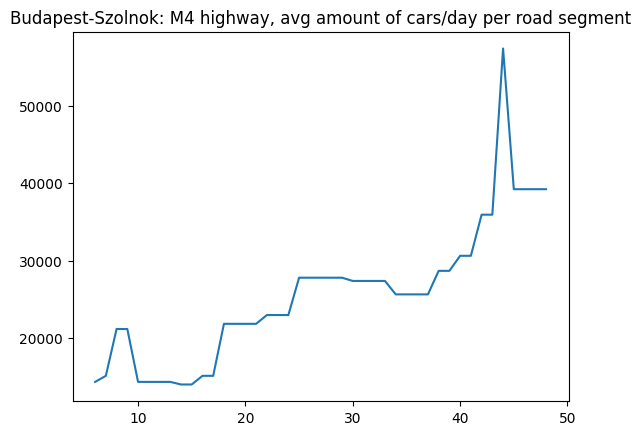

In [225]:
plt.plot(list(range(6,49)), full_road[6:49]['anf'])
plt.title('Budapest-Szolnok: M4 highway, avg amount of cars/day per road segment');

#### Road 4

In [183]:
full_road = gdf[(gdf['kszam']=='4') & (gdf['pkod']!='2')]

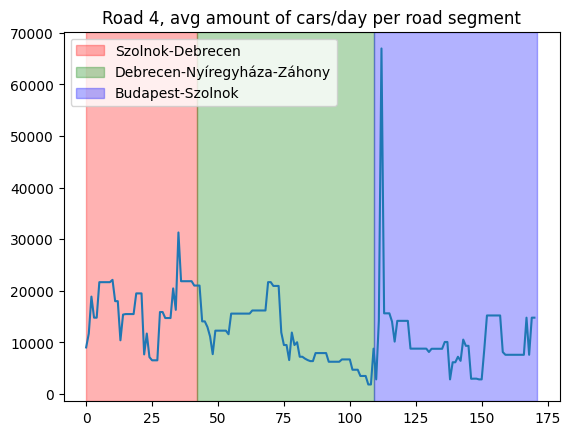

In [202]:
plt.plot(list(range(len(full_road))), full_road['anf'])
plt.title('Road 4, avg amount of cars/day per road segment');
plt.axvspan(0, 42, color='red', alpha=0.3, label='Szolnok-Debrecen')
plt.axvspan(42, 109, color='green', alpha=0.3, label='Debrecen-Nyíregyháza-Záhony')
plt.axvspan(109, 171, color='blue', alpha=0.3, label='Budapest-Szolnok')
plt.legend()


Szolnok-Debrecen: Road 4

<Axes: >

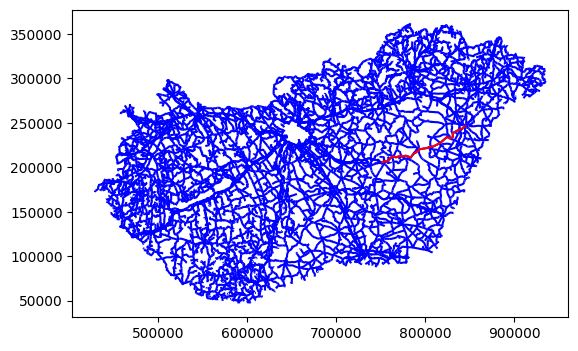

In [174]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[0:42].plot(ax=ax, color='red')

Road 4 between Debrecen and Nyíregyháza, and Záhony:

<Axes: >

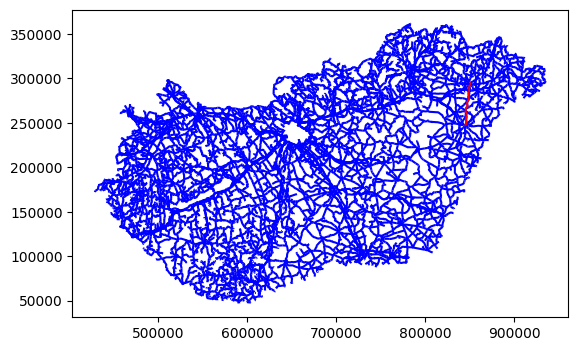

In [201]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[42:75].plot(ax=ax, color='red') #Nyíregyháza around :75, Záhony till :109

Road 4 from Budapest to Szolnok:

<Axes: >

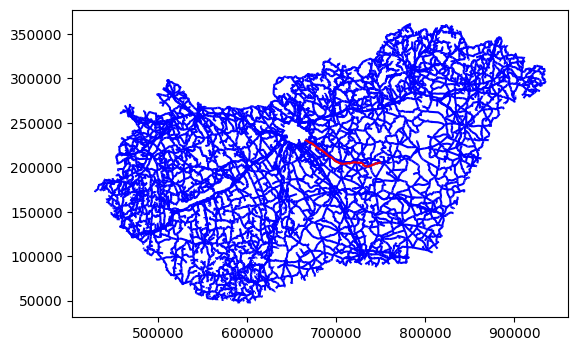

In [182]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[109:].plot(ax=ax, color='red')

#### M3 + M30 + M35

M3:

In [304]:
M3_full_road = gdf[(gdf['kszam']=='M3') & (gdf['pkod']!='2')]
M30_full_road = gdf[(gdf['kszam']=='M30') & (gdf['pkod']!='2')]
M35_full_road = gdf[(gdf['kszam']=='M35') & (gdf['pkod']!='2')]

<Axes: >

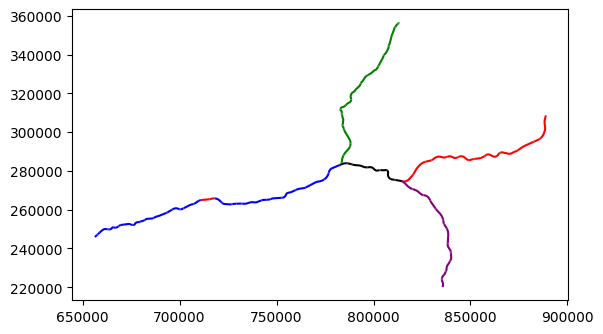

In [310]:
ax = M3_full_road[0:32].plot( color='red')
M3_full_road[32:46].plot(ax=ax, color='black')
M3_full_road[46:].plot(ax=ax, color='blue')
M30_full_road.plot(ax=ax, color='green')
M35_full_road.plot(ax=ax, color='purple')

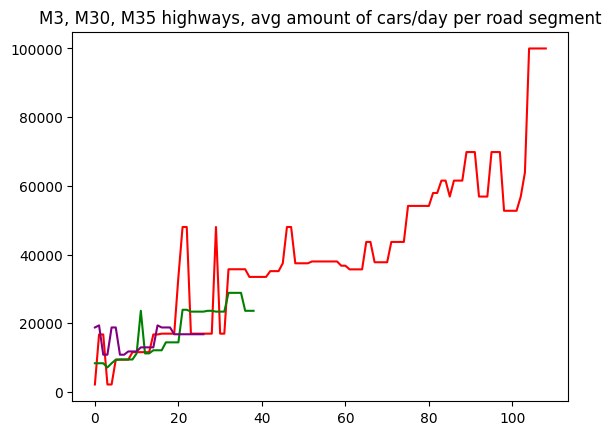

In [309]:
plt.plot(list(range(len(M3_full_road))), M3_full_road['anf'], color='red')
plt.plot(list(range(len(M30_full_road))), M30_full_road['anf'], color='green')
plt.plot(list(range(len(M35_full_road))), M35_full_road['anf'], color='purple')
plt.title('M3, M30, M35 highways, avg amount of cars/day per road segment');

#### Road 3 + 35

Road 3: Firstly, through the division point, then to Miskolc<br>
Road 35: Division point to Debrecen<br>

In [312]:
full_road_3 = gdf[(gdf['kszam']=='3') & (gdf['pkod']!='2')]
full_road_35 = gdf[(gdf['kszam']=='35') & (gdf['pkod']!='2')]

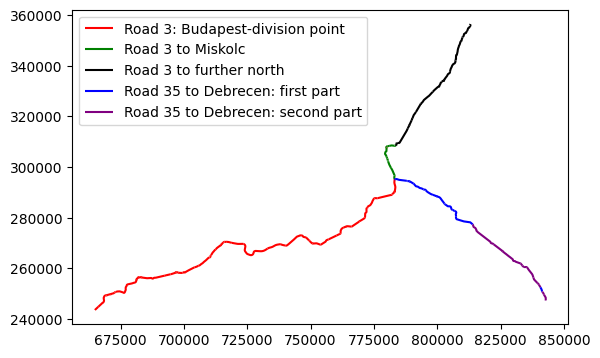

In [350]:
ax = full_road_3[0:99].plot(color='red', label='Road 3: Budapest-division point')
full_road_3[99:125].plot(ax = ax, color='green', label='Road 3 to Miskolc')
full_road_3[125:].plot(ax = ax, color='black', label='Road 3 to further north')
full_road_35[0:22].plot(ax = ax, color='blue', label='Road 35 to Debrecen: first part')
full_road_35[22:].plot(ax = ax, color='purple', label='Road 35 to Debrecen: second part')
plt.legend(loc='upper left');

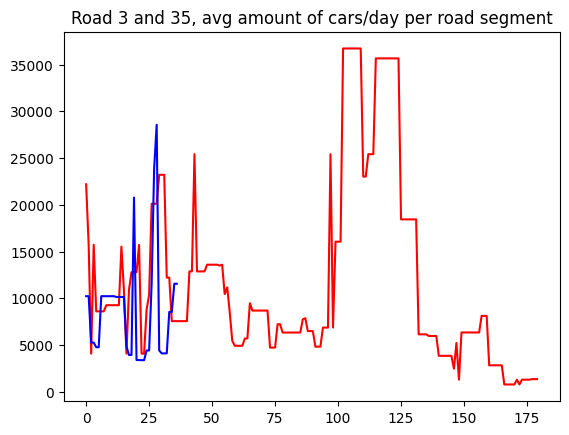

In [347]:
plt.plot(list(range(len(full_road_3))), full_road_3['anf'], color='red')
plt.plot(list(range(len(full_road_35))), full_road_35['anf'], color='blue')
plt.title('Road 3 and 35, avg amount of cars/day per road segment');

#### Roads between Miskolc and Nyíregyháza

The two roads that connect Miskolc and Nyíregyháza are 37 and 38, 38 is the continuation of 37.

In [218]:
full_road_37 = gdf[(gdf['kszam']=='37') & (gdf['pkod']!='2')]
full_road_38 = gdf[(gdf['kszam']=='38') & (gdf['pkod']!='2')]

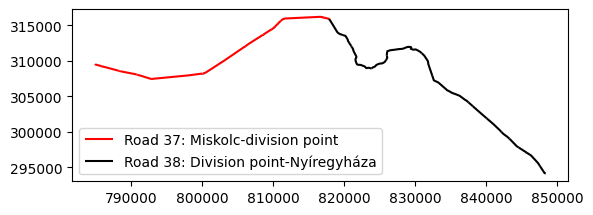

In [232]:
ax = full_road_37[0:34].plot( color='red', label='Road 37: Miskolc-division point')
full_road_38.plot(ax=ax, color='black', label='Road 38: Division point-Nyíregyháza')
plt.legend(loc='lower left');

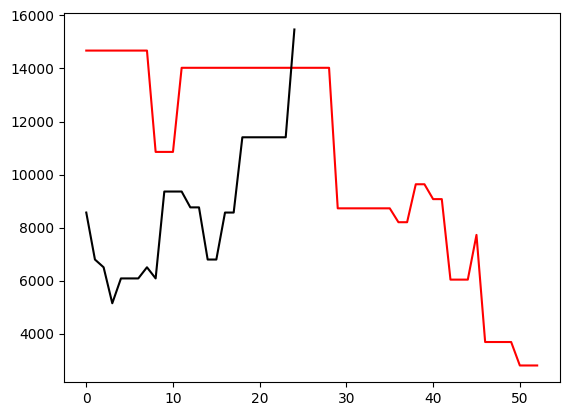

In [222]:
plt.plot(list(range(len(full_road_37))), full_road_37['anf'], color='red')
plt.plot(list(range(len(full_road_38))), full_road_38['anf'], color='black')

#### M6

Does not totally go to Pécs, but we still consider it, as some may use it to go to Pécs

In [363]:
full_road = gdf[(gdf['kszam']=='M6') & (gdf['pkod']!='2')]

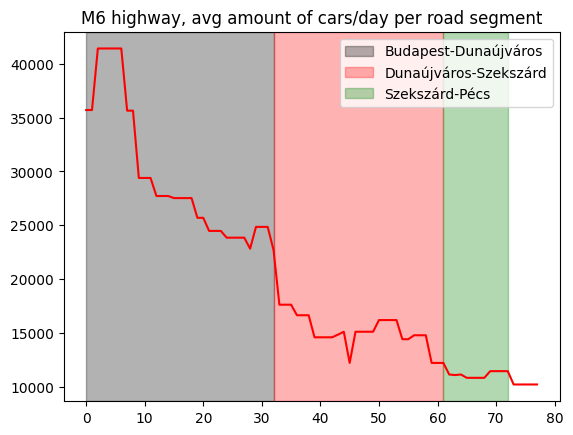

In [381]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')
plt.title('M6 highway, avg amount of cars/day per road segment');
plt.axvspan(0, 32, color='black', alpha=0.3, label='Budapest-Dunaújváros')
plt.axvspan(32, 61, color='red', alpha=0.3, label='Dunaújváros-Szekszárd')
plt.axvspan(61, 72, color='green', alpha=0.3, label='Szekszárd-Pécs')
plt.legend()

#### Road 6

In [5]:
full_road = gdf[(gdf['kszam']=='6') & (gdf['pkod']!='2')]

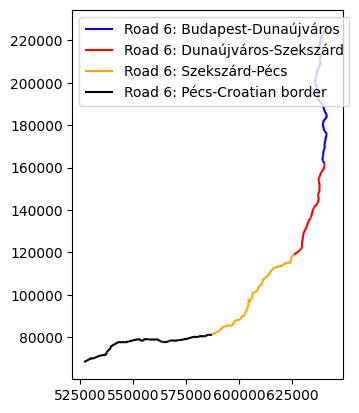

In [9]:
ax = full_road[0:60].plot( color='blue', label='Road 6: Budapest-Dunaújváros')
full_road[60:80].plot(ax=ax, color='red', label='Road 6: Dunaújváros-Szekszárd')
full_road[80:125].plot(ax=ax, color='orange', label='Road 6: Szekszárd-Pécs')
full_road[125:].plot(ax=ax, color='black', label='Road 6: Pécs-Croatian border')
plt.legend(loc='upper left');

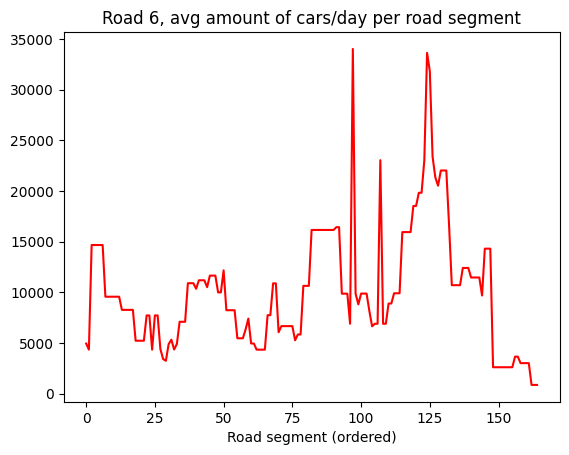

In [10]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')
plt.title('Road 6, avg amount of cars/day per road segment');
plt.xlabel('Road segment (ordered)');

#### M7

In [11]:
full_road = gdf[(gdf['kszam']=='M7') & (gdf['pkod']!='2')]

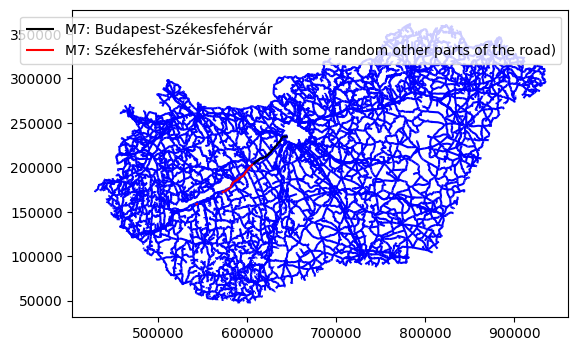

In [75]:
ax = gdf.plot(color='blue', )#alpha=0.5, edgecolor='k'
full_road[0:30].plot(ax=ax, color='black', label='M7: Budapest-Székesfehérvár')
full_road[30:50].plot(ax=ax, color='red', label='M7: Székesfehérvár-Siófok (with some random other parts of the road)')
plt.legend();

<Axes: >

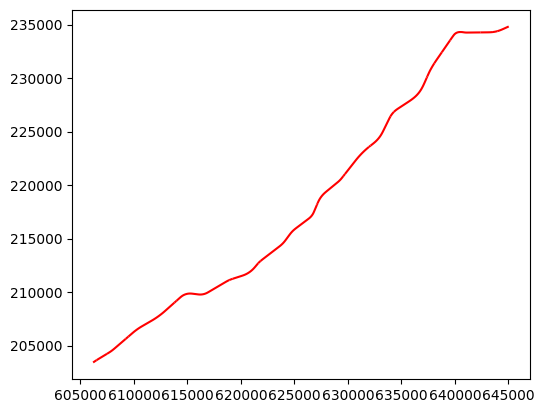

In [77]:
budapest_szekesfehervar_M7 = pd.concat([full_road[0:18], full_road[19:20], full_road[21:30]])
budapest_szekesfehervar_M7.plot(color='red')

<Axes: >

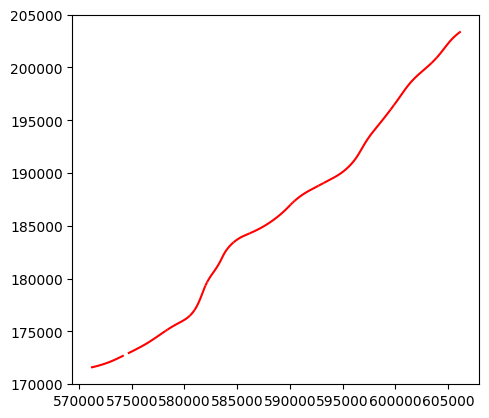

In [78]:
szekesfehervar_siofok_M7 = pd.concat([full_road[30:45], full_road[46:50]])
szekesfehervar_siofok_M7.plot(color='red')

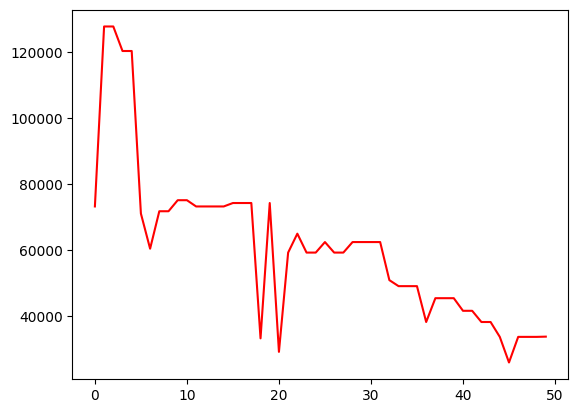

In [65]:
plt.plot(list(range(len(full_road[0:50]))), full_road['anf'][0:50], color='red')

In [80]:
x = {
    "Budapest_Székesfehérvár_M7": (lambda t: pd.concat([t[0:18], t[19:20], t[21:30]])['id'].tolist()) (gdf[((gdf['kszam']=='M7')) & (gdf['pkod']!='2')])
}
len(x['Budapest_Székesfehérvár_M7'])

28

#### Road 7

In [82]:
full_road = gdf[(gdf['kszam']=='7') & (gdf['pkod']!='2')]

<Axes: >

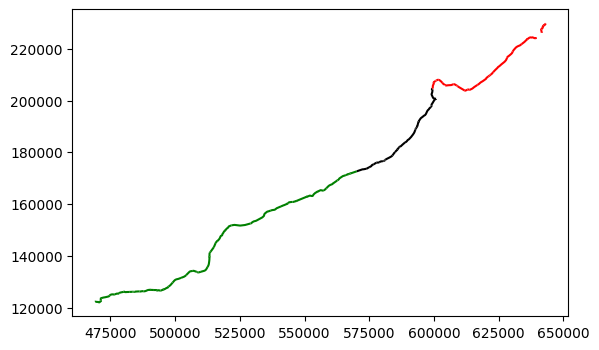

In [91]:
ax = full_road[0:46].plot( color='red', label='Road 7: Budapest-Székesfehérvár')
full_road[46:85].plot(ax=ax, color='black', label='Road 7: Székesfehérvár-Siófok')
full_road[85:].plot(ax=ax, color='green', label='Road 7: Siófok-Croatian border')



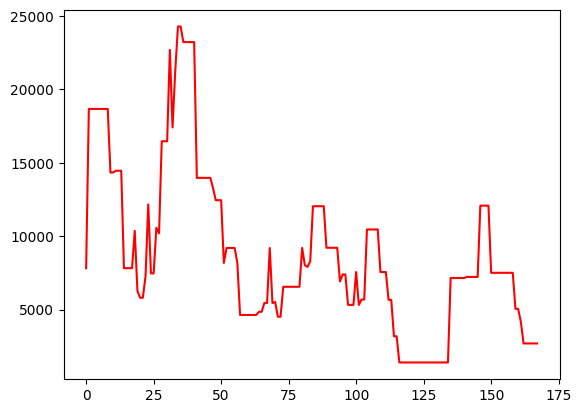

In [86]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')

#### M1

In [92]:
full_road = gdf[(gdf['kszam']=='M1') & (gdf['pkod']!='2')]

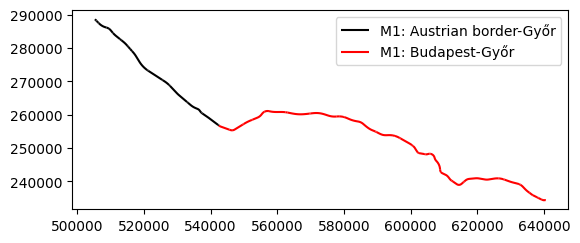

In [104]:
ax = full_road[0:28].plot(color='black', label='M1: Austrian border-Győr')
full_road[28:].plot(ax=ax, color='red', label='M1: Budapest-Győr')
plt.legend();

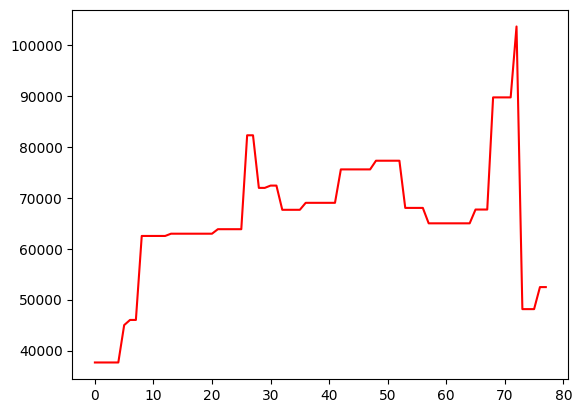

In [98]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')

#### Road 1

In [121]:
full_road = gdf[(gdf['kszam']=='1') & (gdf['pkod']!='2')]

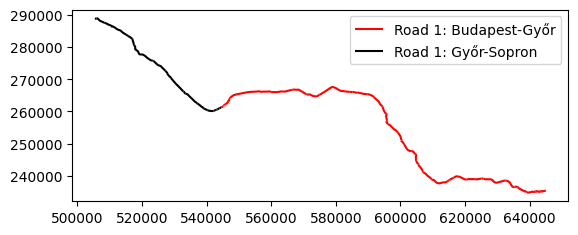

In [119]:
ax = full_road[0:105].plot( color='red', label='Road 1: Budapest-Győr')
full_road[105:].plot(ax=ax, color='black', label='Road 1: Győr-Sopron')
plt.legend();

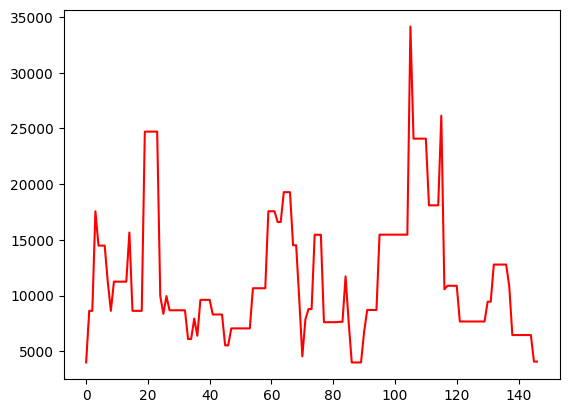

In [108]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')

#### M85

In [150]:
full_road = gdf[(gdf['kszam']=='M85') & (gdf['pkod']!='2')]

<Axes: >

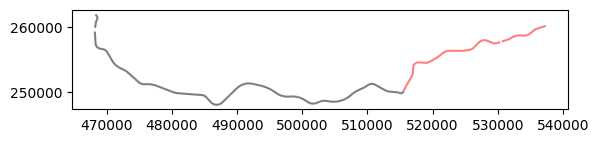

In [154]:
ax = full_road[2:12].plot( color='red', alpha=0.5, label='M85: Győr-division point')
full_road[12:33].plot(ax = ax, color='black', alpha=0.5, label='M85: division point-Sopron')

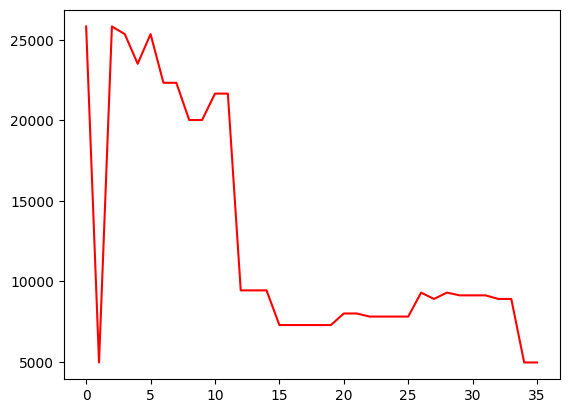

In [149]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red');

#### Road 85

In [190]:
full_road = gdf[(gdf['kszam']=='85') & (gdf['pkod']!='2')]

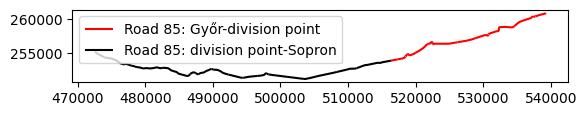

In [189]:
ax = full_road[:32].plot( color='red', label='Road 85: Győr-division point')
full_road[32:].plot(ax=ax, color='black', label='Road 85: division point-Sopron')
plt.legend(loc='upper left');

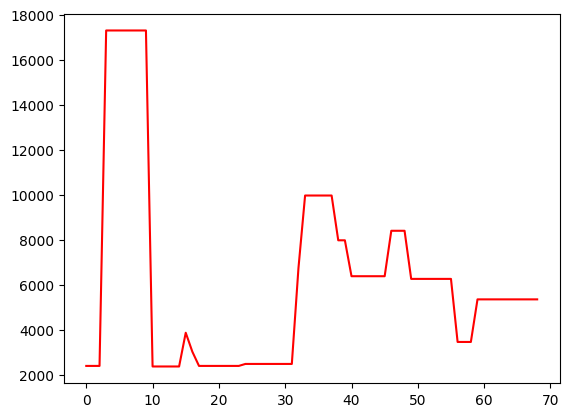

In [182]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')

#### M86

In [201]:
full_road = gdf[(gdf['kszam']=='M86') & (gdf['pkod']!='2')]

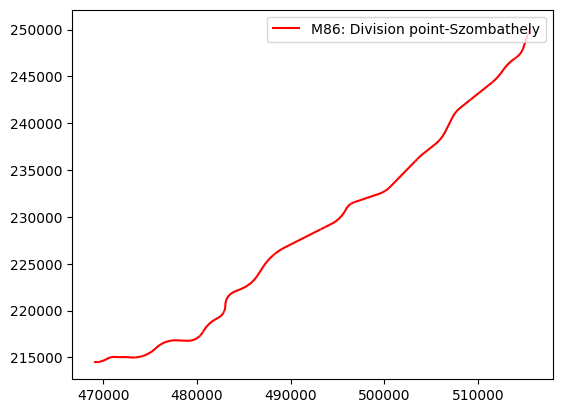

In [202]:
full_road[0:27].plot(color='red', label='M86: Division point-Szombathely')
plt.legend();

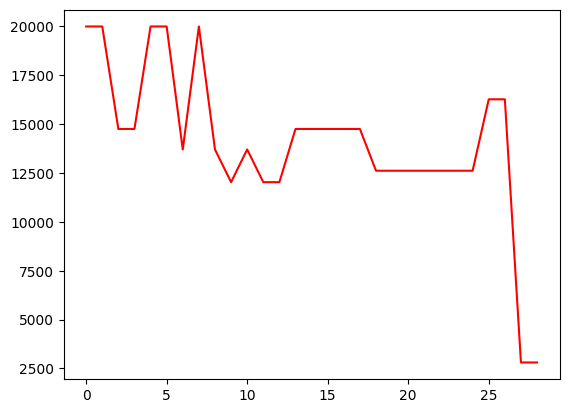

In [168]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red');

#### Road 86

In [204]:
full_road = gdf[(gdf['kszam']=='86') & (gdf['pkod']!='2')]

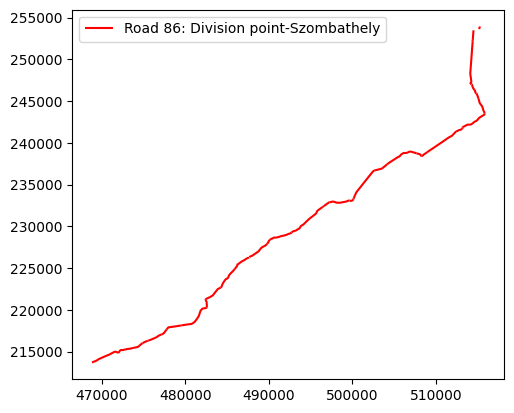

In [214]:
ax = full_road[52:95].plot( color='red', label='Road 86: Division point-Szombathely')
plt.legend(loc='upper left');

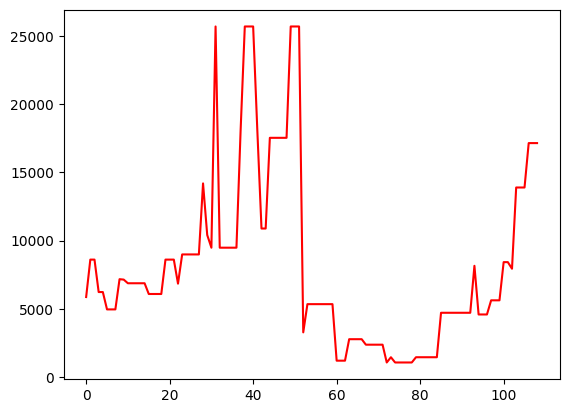

In [200]:
plt.plot(list(range(len(full_road))), full_road['anf'], color='red')

### Network building:

In [268]:
roads_ids = {#Excluding Pkod 2 helps keep bidirectional roads (pkod 0), and for unidirectional roads, only one direction is kept (pkod 1)
    "Budapest_Szolnok_M4": gdf[(gdf['kszam']=='M4') &  (gdf['pkod']!='2')][18:49]['id'].tolist(),
    "Budapest_Szolnok_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][109:]['id'].tolist(),
    "Szolnok_Debrecen_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][0:42]['id'].tolist(),
    "Debrecen_Nyiregyhaza_4": gdf[(gdf['kszam']=='4' )& (gdf['pkod']!='2')][42:75]['id'].tolist(),

    "Budapest_Kecskemet_M5": gdf[((gdf['kszam']=='M5')) &  (gdf['pkod']!='2')][0:30]['id'].tolist(),
    "Budapest_Kecskemet_5": gdf[((gdf['kszam']=='5')) &  (gdf['pkod']!='2')][7:60]['id'].tolist(),
    "Kecskemet_Szeged_M5": gdf[((gdf['kszam']=='M5')) &  (gdf['pkod']!='2')][30:50]['id'].tolist(),
    "Kecskemet_Szeged_5": gdf[((gdf['kszam']=='5')) &  (gdf['pkod']!='2')][60:130]['id'].tolist(),

    "Budapest_div_point_Miskolc_Debrecen_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][46:]['id'].tolist(),
    "Budapest_div_point_Miskolc_Debrecen_3": gdf[((gdf['kszam']=='3')) & (gdf['pkod']!='2')][0:99]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Miskolc_M30": gdf[((gdf['kszam']=='M30')) & (gdf['pkod']!='2')]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Miskolc_3": gdf[((gdf['kszam']=='3')) & (gdf['pkod']!='2')][99:125]['id'].tolist(),
    "div_point_Debrecen_Nyíregyháza_Nyíregyháza_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][5:32]['id'].tolist(),
    "div_point_Miskolc_Debrecen_div_point_Debrecen_Nyíregyháza_M3": gdf[((gdf['kszam']=='M3')) & (gdf['pkod']!='2')][32:46]['id'].tolist(),
    "div_point_Miskolc_Debrecen_div_point_Debrecen_Nyíregyháza_35": gdf[((gdf['kszam']=='35')) & (gdf['pkod']!='2')][0:22]['id'].tolist(),
    "div_point_Miskolc_Debrecen_Debrecen_M35": gdf[((gdf['kszam']=='M35')) & (gdf['pkod']!='2')]['id'].tolist(),
    "div_point_Debrecen_Nyíregyháza_Debrecen_35": gdf[((gdf['kszam']=='35')) & (gdf['pkod']!='2')][22:]['id'].tolist(),
    "Miskolc_Nyíregyháza_37_38": gdf[(((gdf['kszam']=='37') & (gdf['pkod']!='2')))][0:34]['id'].tolist() + gdf[(((gdf['kszam']=='38')& (gdf['pkod']!='2')))]['id'].tolist(),

    "Budapest_Dunaújváros_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][0:32]['id'].tolist(),
    "Budapest_Dunaújváros_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][0:60]['id'].tolist(),
    "Dunaújváros_Szekszárd_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][32:61]['id'].tolist(),
    "Dunaújváros_Szekszárd_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][60:80]['id'].tolist(),
    "Szekszárd_Pécs_M6": gdf[((gdf['kszam']=='M6')) & (gdf['pkod']!='2')][61:73]['id'].tolist(),
    "Szekszárd_Pécs_6": gdf[((gdf['kszam']=='6')) & (gdf['pkod']!='2')][80:125]['id'].tolist(),

                                #Below line: we take the given road's first 18, 20th, and 22-30th segments      #The road is defined here below, inside the parantheses.
    "Budapest_Székesfehérvár_M7": (lambda road: pd.concat([road[0:18], road[19:20], road[21:30]])['id'].tolist()) (gdf[((gdf['kszam']=='M7')) & (gdf['pkod']!='2')]),
    "Budapest_Székesfehérvár_7": gdf[((gdf['kszam']=='7')) & (gdf['pkod']!='2')][0:46]['id'].tolist(),
                                #Below line: we take the given road's first 18, 20th, and 22-30th segments      #The road is defined here below, inside the parantheses.
    "Székesfehérvár_Siófok_M7": (lambda road: pd.concat([road[30:45], road[46:50]])['id'].tolist()) (gdf[((gdf['kszam']=='M7')) & (gdf['pkod']!='2')]),
    "Székesfehérvár_Siófok_7": gdf[((gdf['kszam']=='7')) & (gdf['pkod']!='2')][46:85]['id'].tolist(),

    "Budapest_Győr_M1": gdf[((gdf['kszam']=='M1')) & (gdf['pkod']!='2')][28:]['id'].tolist(),
    "Budapest_Győr_1": gdf[((gdf['kszam']=='1')) & (gdf['pkod']!='2')][0:105]['id'].tolist(),

    "Győr_div_point_Sopron_Szombathely_M85": gdf[((gdf['kszam']=='M85')) & (gdf['pkod']!='2')][2:12]['id'].tolist(),
    "Győr_div_point_Sopron_Szombathely_85": gdf[((gdf['kszam']=='85')) & (gdf['pkod']!='2')][:32]['id'].tolist(),
    "div_point_Sopron_Szombathely_Sopron_M85": gdf[((gdf['kszam']=='M85')) & (gdf['pkod']!='2')][12:33]['id'].tolist(),
    "div_point_Sopron_Szombathely_Sopron_85": gdf[((gdf['kszam']=='85')) & (gdf['pkod']!='2')][32:]['id'].tolist(),
    "div_point_Sopron_Szombathely_Szombathely_M86": gdf[((gdf['kszam']=='M86')) & (gdf['pkod']!='2')][0:27]['id'].tolist(),
    "div_point_Sopron_Szombathely_Szombathely_86": gdf[((gdf['kszam']=='86')) & (gdf['pkod']!='2')][52:95]['id'].tolist()
}

In [259]:
#div_point_Miskolc_Debrecen
routes = [
    ["Budapest", "Kecskemét", "Szeged"], #M5
    ["Budapest", "Szolnok", "Debrecen", "Nyíregyháza"], #4
    ["Budapest", "div_point_Miskolc_Debrecen", "Miskolc", "Nyíregyháza"], #M3, M30, local roads + 3
    ["Budapest", "div_point_Miskolc_Debrecen", "div_point_Debrecen_Nyíregyháza", "Nyíregyháza"], #M3 + 3
    ["Budapest", "div_point_Miskolc_Debrecen", "div_point_Debrecen_Nyíregyháza", "Debrecen"], #M3, M35 + 3, 35
    ["Budapest", "Dunaújváros", "Szekszárd", "Pécs"], #M6
    ["Budapest", "Székesfehérvár", "Siófok"], #M7
    ["Budapest", "Győr","div_point_Sopron_Szombathely", "Sopron"], #M1, M85, local roads
    ["Budapest", "Győr","div_point_Sopron_Szombathely", "Szombathely"], #M1, M85, local roads

]

geo_positions = {
    "Budapest": (47.497912, 19.040235),
    "Kecskemét": (46.906770, 19.691383),
    "Szeged": (46.253000, 20.141424),
    "Szolnok": (47.172424, 20.178190),
    "Debrecen": (47.531605, 21.627312),
    "Nyíregyháza": (47.955879, 21.716837),
    "Miskolc": (48.104385, 20.791731),
    "Dunaújváros": (46.961511, 18.940582),
    "Szekszárd": (46.348886, 18.706048),
    "Pécs": (46.072734, 18.232266),
    "Székesfehérvár": (47.186644, 18.422595),
    "Siófok": (46.911703, 18.040138),
    "Győr": (47.687453, 17.634782),
    "Sopron": (47.686567, 16.588856),
    "Szombathely": (47.130884, 16.621046),
    "div_point_Miskolc_Debrecen": (47.7, 20.2),
    "div_point_Debrecen_Nyíregyháza": (47.6, 20.8),
    "div_point_Sopron_Szombathely": (47.4, 17.2)
}

An example of road data dictionary:

```python

road_data = {
    ("Budapest", "Szolnok"): [
        {"road": "4", "daily_traffic": np.min(roads_ids["Budapest_Szolnok_4"])}, #Could add: public_road_id, station_numbers
        {"road": "M4", "daily_traffic": np.min(roads_ids["Budapest_Szolnok_M4"])},
    ],
    ("Kecskemét", "Szeged"): [
        ...
    ],
    
}

```

In [ ]:
def road_data_dict_from_OD(origin_destination_tuple_list, roads_ids): #Note: nothing dealt about order, e.g. Szolnok_Budapest vs Budapest_Szolnok
    road_data = {}
    for origin,destination in origin_destination_tuple_list:
        road_data[(origin, destination)] = []
        lookup_name_start = str(origin) + "_" + str(destination) + "_"
        all_matching_roads = [key for key in roads_ids.keys() if key.startswith(lookup_name_start)]#Not sure if .startswith() is faster than e.g. regex
        for road in all_matching_roads:
            road_name = road.split(lookup_name_start)[-1]
            road_ids = roads_ids[road]
    return road_data

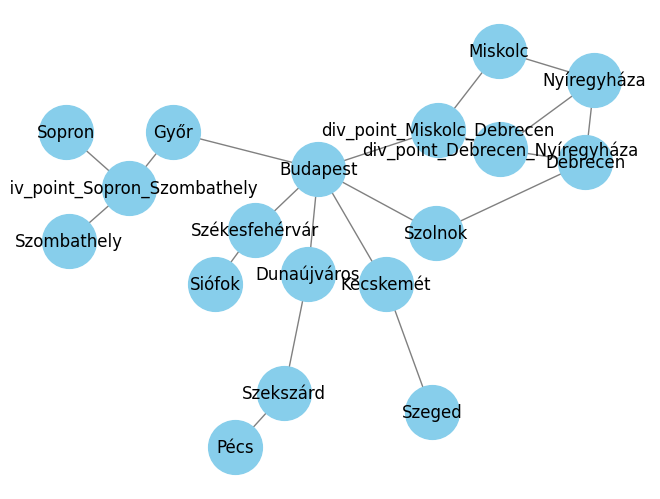

In [260]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for route in routes:
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1])

#Lat/long as plot coordinates
geo_positions = {city: (lon, lat) for city, (lat, lon) in geo_positions.items()}

nx.draw(G, pos=geo_positions, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
plt.show()

## Big cities 2: with extra in-roads (-> P has an inverse)

## Debrecen paths